# London Restaurants - Recommander System

![title](logo.png)

## Data Cleaning

In [3]:
import pandas as pd 
import numpy as np

In [4]:
#dataframe regarding the restaurants
rpay = pd.read_csv('UCIML/chefmozaccepts.csv')
rcuisine = pd.read_csv('UCIML/chefmozcuisine.csv')
ropeninghours= pd.read_csv('UCIML/chefmozhours4.csv')
rparking = pd.read_csv('UCIML/chefmozparking.csv')
rlocation= pd.read_csv('UCIML/geoplaces2.csv')
                       
#ratings
ratings = pd.read_csv('UCIML/rating_final.csv')

#dataframe regarding the users 
ucuisine = pd.read_csv('UCIML/usercuisine.csv')
upay = pd.read_csv('UCIML/userpayment.csv')
uprofile = pd.read_csv('UCIML/userprofile.csv')                         

In [5]:
rpay.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [72]:
rpay['Rpayment'].nunique()

11

In [80]:
df2 = pd.DataFrame(r['Rpayment'].values.tolist())

In [24]:
rpay[rpay ['Rpayment']=='Visa'] = 'VISA'

In [26]:
rpay.drop_duplicates(inplace=True)

In [103]:
rpay['Rpayment'].unique()

array(['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates'], dtype=object)

In [40]:
rcuisine.nunique()

placeID     769
Rcuisine     59
dtype: int64

In [93]:
payment= pd.get_dummies(rpay['Rpayment'])

In [98]:
payment.head()
result = pd.concat([rpay, payment], axis=1)
result.head()

,placeID,Rpayment,American_Express,Carte_Blanche,Diners_Club,Discover,Japan_Credit_Bureau,MasterCard-Eurocard,VISA,bank_debit_cards,cash,checks,gift_certificates
0,135110,cash,0,0,0,0,0,0,0,0,1,0,0
1,135110,VISA,0,0,0,0,0,0,1,0,0,0,0
2,135110,MasterCard-Eurocard,0,0,0,0,0,1,0,0,0,0,0
3,135110,American_Express,1,0,0,0,0,0,0,0,0,0,0
4,135110,bank_debit_cards,0,0,0,0,0,0,0,1,0,0,0


In [111]:
resto = result.groupby(['placeID'])['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Japan_Credit_Bureau', 'gift_certificates'].sum().reset_index()

In [112]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 12 columns):
placeID                611 non-null object
cash                   611 non-null uint8
VISA                   611 non-null uint8
MasterCard-Eurocard    611 non-null uint8
American_Express       611 non-null uint8
bank_debit_cards       611 non-null uint8
checks                 611 non-null uint8
Discover               611 non-null uint8
Carte_Blanche          611 non-null uint8
Diners_Club            611 non-null uint8
Japan_Credit_Bureau    611 non-null uint8
gift_certificates      611 non-null uint8
dtypes: object(1), uint8(11)
memory usage: 11.4+ KB


In [113]:
restaurants = pd.merge(rcuisine, resto, how ='left', on='placeID')

In [114]:
restaurants.head()

,placeID,Rcuisine,cash,VISA,MasterCard-Eurocard,American_Express,bank_debit_cards,checks,Discover,Carte_Blanche,Diners_Club,Japan_Credit_Bureau,gift_certificates
0,135110,Spanish,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135109,Italian,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,135107,Latin_American,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135106,Mexican,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135105,Fast_Food,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
ropeninghours.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [130]:
cc = ropeninghours.pivot_table(index='placeID',columns='days',values='hours', aggfunc=lambda x: ' '.join(x))

In [150]:
cc.columns

Index(['Mon;Tue;Wed;Thu;Fri;', 'Sat;', 'Sun;', 'Open'], dtype='object', name='days')

In [158]:
cc.drop(['Open'], axis=1, inplace= True)

In [142]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 132012 to 135111
Data columns (total 3 columns):
Mon;Tue;Wed;Thu;Fri;    692 non-null object
Sat;                    689 non-null object
Sun;                    680 non-null object
dtypes: object(3)
memory usage: 41.7+ KB


In [161]:
cc.head()

days,Mon;Tue;Wed;Thu;Fri;,Sat;,Sun;
placeID,,,
132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;
132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;
132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;
132026,12:00-14:30; 12:00-14:30;,None,None
132030,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;


In [162]:
cc.rename(columns={'Mon;Tue;Wed;Thu;Fri;': 'MondayToFriday', 'Sat;': 'Saturday','Sun;': 'Sunday'}, inplace=True)

In [165]:
cc.reset_index(inplace=True)
cc

days,index,placeID,MondayToFriday,Saturday,Sunday
0,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;
1,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;
2,2,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;
3,3,132026,12:00-14:30; 12:00-14:30;,None,None
4,4,132030,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;
5,5,132097,06:30-21:00; 06:30-21:00;,06:30-22:00; 06:30-22:00;,06:30-22:00; 06:30-22:00;
6,6,132103,11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:0...,None,11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:0...
7,7,132107,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;
8,8,132108,17:00-01:00; 17:00-01:00;,17:00-01:00; 17:00-01:00;,17:00-01:00; 17:00-01:00;
9,9,132109,17:00-21:00; 17:00-21:00;,17:00-21:00; 17:00-21:00;,17:00-21:00; 17:00-21:00;


In [180]:
def opening(input):
    if input != 'None':
        a = input[:5]
        return a
    else:
        return input

def closing(input):
    if input != 'None':
        b = input[-6:-1] 
        return b 
    else:
        return input

In [181]:
cc['MondayToFriday'] = cc['MondayToFriday'].astype(str)
cc['Saturday'] = cc['Saturday'].astype(str) 
cc['Sunday'] = cc['Sunday'].astype(str) 

In [182]:
cc['MFstart'] = cc['MondayToFriday'].apply(opening)
cc['MFend'] = cc['MondayToFriday'].apply(closing)

cc['Satstart'] = cc['Saturday'].apply(opening)
cc['Satend'] = cc['Saturday'].apply(closing)

cc['Sunstart'] = cc['Sunday'].apply(opening)
cc['Sunend'] = cc['Sunday'].apply(closing)

In [183]:
cc.head()

days,index,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend
0,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00
1,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00
2,2,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00
3,3,132026,12:00-14:30; 12:00-14:30;,None,None,12:00,14:30,None,None,None,None
4,4,132030,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00,21:00,12:00,21:00,12:00,21:00


In [188]:
restaurants = pd.merge(cc, rparking, how ='left', on='placeID')

In [189]:
restaurants.head()

,index,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,Sunend,parking_lot
0,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,public
1,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,22:00,street
2,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,fee
3,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,00:00,public
4,2,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,21:00,street


In [199]:
rparking
parking= pd.get_dummies(rparking['parking_lot'])

result2 = pd.concat([rparking, parking], axis=1)


park = result2.groupby(['placeID'])['public', 'none', 'yes', 'valet parking', 'fee', 'street',
       'validated parking'].sum().reset_index()

In [202]:
restaurants = pd.merge(restaurants, park, how ='left', on='placeID')

In [191]:
rparking['parking_lot'].nunique()

7

In [186]:
rparking.drop_duplicates(inplace=True)

In [204]:
rlocation.drop_duplicates(inplace=True)

In [207]:
restaurants = pd.merge(restaurants, rlocation, how ='left', on='placeID')

In [208]:
restaurants

,index,placeID,MondayToFriday,Saturday,Sunday,MFstart,MFend,Satstart,Satend,Sunstart,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,132012,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,132023,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00-00:00; 11:00-00:00;,11:00,00:00,11:00,00:00,11:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,132024,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00-21:00; 11:00-21:00;,11:00,21:00,11:00,21:00,11:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,132026,12:00-14:30; 12:00-14:30;,None,None,12:00,14:30,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,132030,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00-15:00;15:00-21:00; 12:00-15:00;15:00-21:00;,12:00,21:00,12:00,21:00,12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,132097,06:30-21:00; 06:30-21:00;,06:30-22:00; 06:30-22:00;,06:30-22:00; 06:30-22:00;,06:30,21:00,06:30,22:00,06:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,132103,11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:0...,None,11:00-16:00;16:00-13:00;16:00-12:00;16:00-21:0...,11:00,21:00,None,None,11:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,132107,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00-22:00; 12:00-22:00;,12:00,22:00,12:00,22:00,12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fixing Null Values**

In [5]:
df.isnull().sum()

uniq_id                    0
url                        0
restaurant_id              0
restaurant_location        0
name                       0
category                   0
title                   2201
review_date             2292
review_text             2201
author                  2268
author_url              2531
location                5502
rating                  2773
food                   11158
value                  10975
service                10867
visited_on              3331
dtype: int64

In [6]:
df.dropna(subset = ['rating'], inplace=True)
df.dropna(subset = ['review_date'], inplace=True)

In [7]:
df.isnull().sum()

uniq_id                   0
url                       0
restaurant_id             0
restaurant_location       0
name                      0
category                  0
title                     0
review_date               0
review_text               0
author                   63
author_url              278
location               3155
rating                    0
food                   8518
value                  8340
service                8235
visited_on             1118
dtype: int64

**Creating new variables**

In [8]:
df['visited_month'],df['visited_year'] = df['visited_on'].str.split(' ',1).str

In [9]:
df.drop(['visited_on'], axis=1, inplace=True)

In [10]:
df.head()

,uniq_id,url,restaurant_id,restaurant_location,name,category,title,review_date,review_text,author,author_url,location,rating,food,value,service,visited_month,visited_year
0,76b689f7956f0dc70bda40450e0bae1c,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d1988022,London,Balans Soho Society,Review of restaurants,“Breakfast at balans a must ! ”,2015-07-28,Fantastic as usual with friendly service ... W...,richard5003,https://www.tripadvisor.co.uk/members/richard5003,NaN,5 of 5 bubbles,NaN,NaN,NaN,June,2015
1,0712b79accc38942797b4ca27eabf98d,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d5600132,London,Duke of York,Review of restaurants,“Ok for a quick pint”,2014-06-17,"Average pub, where you can be serve quickly. T...",pierre l,https://www.tripadvisor.co.uk/members/714pierrel,"London, United Kingdom",3 of 5 bubbles,3 of 5 bubbles,4 of 5 bubbles,3 of 5 bubbles,May,2014
2,eb50da7d57e9cd6cdb84220cf09dc70b,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d2257005,London,Dawat Restaurant,Review of restaurants,“Good Pakistani food”,2016-12-19,Personally my favourite Pakistani restaurant i...,Ehsiii,https://www.tripadvisor.co.uk/members/Ehsiii,NaN,4 of 5 bubbles,NaN,NaN,NaN,December,2016
3,b29e2213a0f62d29ef9bfd3aeb2b18ef,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d1123250,London,Gourmet Burger Kitchen Ealing,Review of restaurants,“Great Burgers”,2016-02-18,For a while now I’ve been dreaming of that Bur...,Gary B,https://www.tripadvisor.co.uk/members/252garyb,"London, England, United Kingdom",4 of 5 bubbles,4 of 5 bubbles,4 of 5 bubbles,4 of 5 bubbles,February,2016
4,994256feb6c70231ebf5ae0ec919473c,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d2689314,London,Lingo,Review of restaurants,“Good Japanese Food in Soho”,2014-12-22,It's close to Regent Street and its tucked awa...,benbecks23,https://www.tripadvisor.co.uk/members/benbecks23,"Singapore, Singapore",4 of 5 bubbles,4 of 5 bubbles,4 of 5 bubbles,5 of 5 bubbles,December,2014


**Create clean rating values**

In [11]:
def create_rating(row):
    return row.str.split(' ',1).str.get(0)

def same(row): 
    return row


In [12]:
df['rating']= df['rating'].str.split(' ',1).str.get(0)
df['food']= df[['food']].apply(lambda row: create_rating(row) if row.notnull().all() else same(row), axis=1)

df['value']= df[['value']].apply(lambda row: create_rating(row) if row.notnull().all() else same(row), axis=1)

df['service']= df[['service']].apply(lambda row: create_rating(row) if row.notnull().all() else same(row), axis=1)

In [13]:
df.head()

,uniq_id,url,restaurant_id,restaurant_location,name,category,title,review_date,review_text,author,author_url,location,rating,food,value,service,visited_month,visited_year
0,76b689f7956f0dc70bda40450e0bae1c,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d1988022,London,Balans Soho Society,Review of restaurants,“Breakfast at balans a must ! ”,2015-07-28,Fantastic as usual with friendly service ... W...,richard5003,https://www.tripadvisor.co.uk/members/richard5003,NaN,5,NaN,NaN,NaN,June,2015
1,0712b79accc38942797b4ca27eabf98d,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d5600132,London,Duke of York,Review of restaurants,“Ok for a quick pint”,2014-06-17,"Average pub, where you can be serve quickly. T...",pierre l,https://www.tripadvisor.co.uk/members/714pierrel,"London, United Kingdom",3,3,4,3,May,2014
2,eb50da7d57e9cd6cdb84220cf09dc70b,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d2257005,London,Dawat Restaurant,Review of restaurants,“Good Pakistani food”,2016-12-19,Personally my favourite Pakistani restaurant i...,Ehsiii,https://www.tripadvisor.co.uk/members/Ehsiii,NaN,4,NaN,NaN,NaN,December,2016
3,b29e2213a0f62d29ef9bfd3aeb2b18ef,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d1123250,London,Gourmet Burger Kitchen Ealing,Review of restaurants,“Great Burgers”,2016-02-18,For a while now I’ve been dreaming of that Bur...,Gary B,https://www.tripadvisor.co.uk/members/252garyb,"London, England, United Kingdom",4,4,4,4,February,2016
4,994256feb6c70231ebf5ae0ec919473c,https://www.tripadvisor.co.uk/ShowUserReviews-...,g186338-d2689314,London,Lingo,Review of restaurants,“Good Japanese Food in Soho”,2014-12-22,It's close to Regent Street and its tucked awa...,benbecks23,https://www.tripadvisor.co.uk/members/benbecks23,"Singapore, Singapore",4,4,4,5,December,2014


**Fixing error values**

In [14]:
df[df['rating']=='September']=np.nan

In [15]:
df[df['rating']=='April']=np.nan

In [16]:
df[df['rating']=='April']

,uniq_id,url,restaurant_id,restaurant_location,name,category,title,review_date,review_text,author,author_url,location,rating,food,value,service,visited_month,visited_year


In [17]:
df[['rating', 'food','value','service']] = df[['rating', 'food','value','service']].astype(float)

In [18]:
df.dtypes

uniq_id                 object
url                     object
restaurant_id           object
restaurant_location     object
name                    object
category                object
title                   object
review_date             object
review_text             object
author                  object
author_url              object
location                object
rating                 float64
food                   float64
value                  float64
service                float64
visited_month           object
visited_year            object
dtype: object

In [19]:
months_mapping = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5,  "June": 6,"July": 7,
                  "August": 8,"September": 9, "October": 10, "November": 11, "December": 12}
df['visited_month_num'] = df['visited_month'].map(months_mapping)

# EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Best rated restautants**

In [21]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Melange                         5.0
Boro Bistro                     5.0
Boyds Grill & Wine Bar          5.0
IoD - Institute of Directors    5.0
Iran Restaurant                 5.0
Name: rating, dtype: float64

**Restaurants having highest number of reviews**

In [22]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Union Jacks                     800
Pret a Manger                   666
TGI Friday's - Covent Garden    532
R.S.Hispaniola                  501
Rules Restaurant                443
Name: rating, dtype: int64

**Calculate the average rating by restaurant**

In [23]:
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings.head()

,rating
name,
10 Greek Street,3.0
100 Wardour St,5.0
108 Brasserie,5.0
155 Bar & Kitchen,2.5
2 Bridge Place,4.5


**Creating a new dataframe with the average rating and number of total ratings by restaurant**

In [24]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
10 Greek Street,3.0,1
100 Wardour St,5.0,2
108 Brasserie,5.0,2
155 Bar & Kitchen,2.5,2
2 Bridge Place,4.5,2


**Histogram (Number of Ratings)**

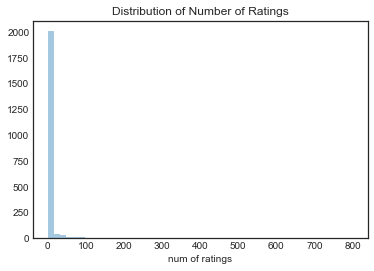

In [25]:
g = sns.distplot(ratings['num of ratings'],kde=False)
g.set_title('Distribution of Number of Ratings');

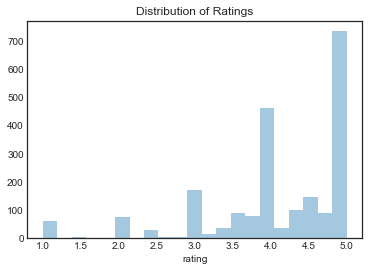

In [26]:
g = sns.distplot(ratings['rating'],kde=False)
g.set_title('Distribution of Ratings');

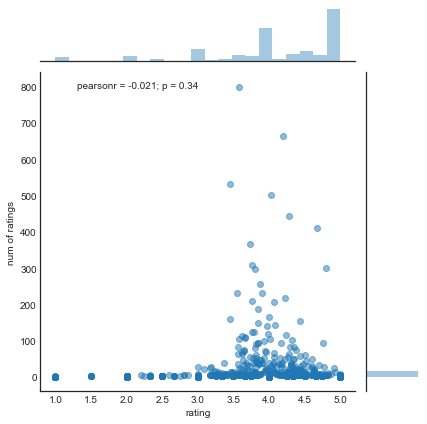

In [27]:
g = sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5);

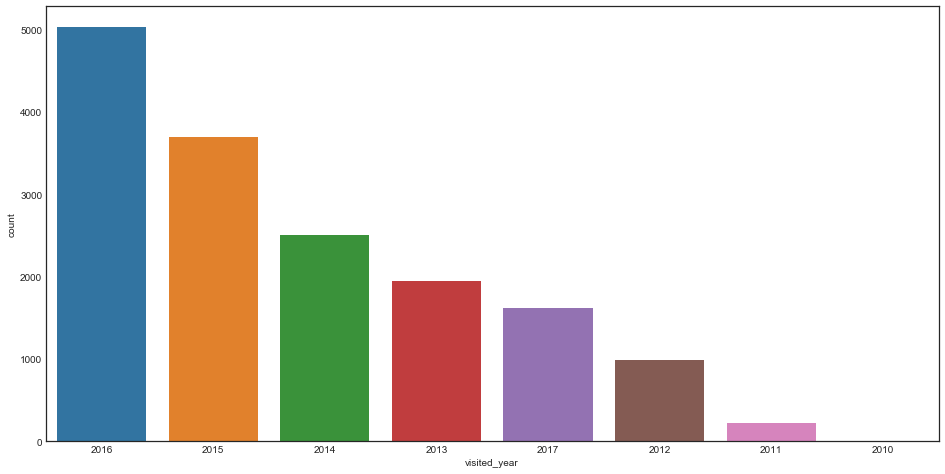

In [28]:
plt.figure(figsize = (16,8))
sns.countplot(x="visited_year", data=df,  order=df["visited_year"].value_counts().index)

In [29]:
timevsrating = pd.DataFrame(df.groupby(['visited_month_num','visited_year'])['rating'].mean())

In [30]:
timevsrating = timevsrating.reset_index()

In [31]:
timevsrating.head()

,visited_month_num,visited_year,rating
0,1.0,2011,3.250000
1,1.0,2012,4.290323
2,1.0,2013,4.138298
3,1.0,2014,4.055901
4,1.0,2015,3.845815


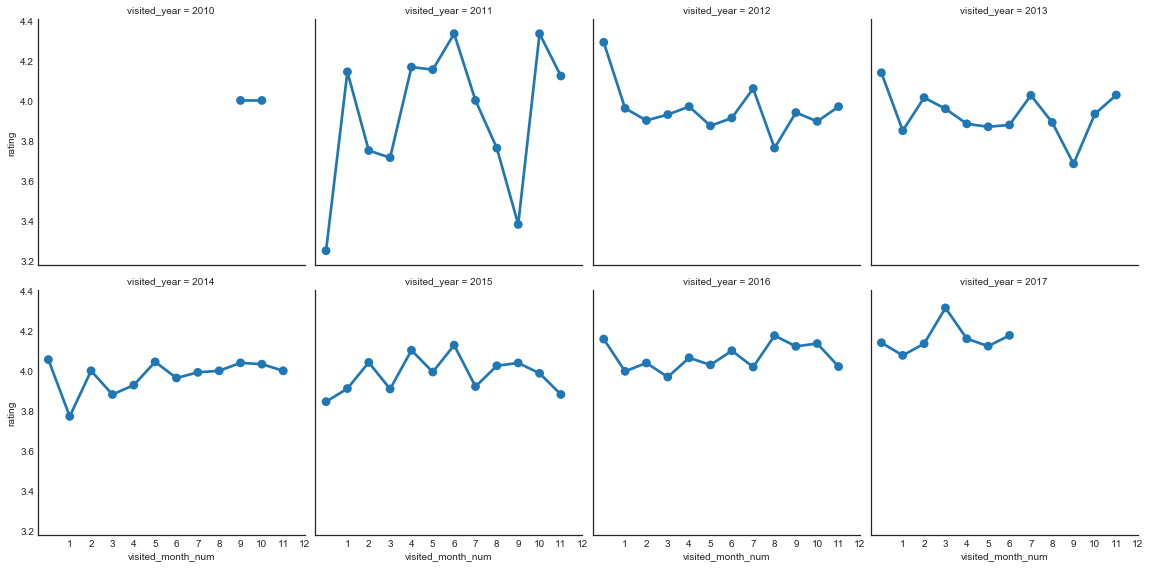

In [32]:
g = sns.factorplot(data = timevsrating, x = 'visited_month_num', y = "rating", col_wrap=4,
               col = 'visited_year', 
               #hue = 'visited_year',
               #row = 'Promo' 
               )
g.set(xticks=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0], xticklabels= [1,2,3,4,5,6,7,8,9,10,11,12]);


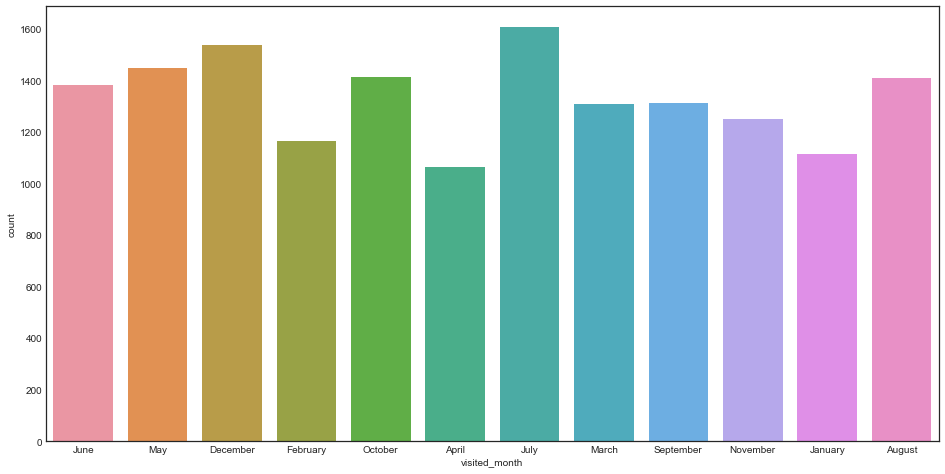

In [33]:
plt.figure(figsize = (16,8))
sns.countplot(x="visited_month", data=df)

# Recommending Similar Restaurants

**Creating a matrix: ratings, author, restaurant name**

In [35]:
restmat = df.pivot_table(index='author',columns='name',values='rating')
restmat.head()

name,10 Greek Street,100 Wardour St,108 Brasserie,155 Bar & Kitchen,2 Bridge Place,202 Restaurant,222 Veggie Vegan,26 Grains,28-50,28-50 Fetter Lane,...,Zoilo,Zuma,brutti & boni - Bottega Contemporanea,maze Grill Park Walk,piggies,sketch Gallery,taNgia,ting n ting ltd,wasabi sushi and bento,​Byward Kitchen and Bar
author,,,,,,,,,,,,,,,,,,,,,
007Liz006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Jenn_Jenn01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Saffy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01bert0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Ranking ratings by their count**

In [36]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Union Jacks,3.578750,800
Pret a Manger,4.195195,666
TGI Friday's - Covent Garden,3.453008,532
R.S.Hispaniola,4.021956,501
Rules Restaurant,4.277652,443
Park Terrace Restaurant Lounge and Bar,4.678832,411
The Sea Shell Of Lisson Grove,3.732970,367
Elliot's Cafe,3.757282,309
Green Pea,4.796667,300


**Selecting user ratings for the restaurants called 'Pret a Manger' and 'Union Jacks'**

In [37]:
UnionJacks_user_ratings = restmat['Union Jacks']
PretaManger_user_ratings = restmat['Pret a Manger']
UnionJacks_user_ratings.head()

author
007Liz006        3.5
0174             NaN
01Jenn_Jenn01    NaN
01Saffy          NaN
01bert0          NaN
Name: Union Jacks, dtype: float64

**Use the .corrwith() method to calculate come up with similar restaurants**

Please note that I am using here the content based method.

The recommendation is based on descriptive attributes of the elements in our case the ratings to make recommendation. and similarities between customer requirements and elment, or on the use of constraints specifying user requirements. 

When a friend asks you for a book recommendation, it’s pretty natural to ask what kinds of books they like. From there, you could think of a few titles that are similar to the things they’ve liked in the past. This process, of recommending content based on its characteristics, is at the heart of content-based filtering, the technology behind Netflix and Pandora’s recommendation engines.


In [38]:
similar_to_UnionJacks = restmat.corrwith(UnionJacks_user_ratings)
similar_to_PretaManger = restmat.corrwith(PretaManger_user_ratings)

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [39]:
corr_UnionJacks = pd.DataFrame(similar_to_UnionJacks,columns=['Correlation'])
corr_UnionJacks.dropna(inplace=True)
corr_UnionJacks.head()

,Correlation
name,
Anglo Spice Grill,-1.000000
Belushi's - Covent Garden,0.166667
Charterhouse Bar,1.000000
Cote,0.000000
Dim t - Victoria,1.000000


In [40]:
corr_UnionJacks.sort_values('Correlation',ascending=False).head(10)

,Correlation
name,
Dim t - Victoria,1.000000
The Anthologist Bar & Restaurant,1.000000
San Lorenzo Wimbledon,1.000000
Charterhouse Bar,1.000000
Freud Cafe London,1.000000
Mora Meza Bar & Restaurant,1.000000
Union Jacks,1.000000
Hardcore Lobster And More,0.993399
Little Frankies,0.866025


In [41]:
corr_UnionJacks = corr_UnionJacks.join(ratings['num of ratings'])
corr_UnionJacks.head()

,Correlation,num of ratings
name,,
Anglo Spice Grill,-1.000000,20
Belushi's - Covent Garden,0.166667,124
Charterhouse Bar,1.000000,94
Cote,0.000000,217
Dim t - Victoria,1.000000,232


In [42]:
corr_UnionJacks[corr_UnionJacks['num of ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,
Dim t - Victoria,1.000000,232
Freud Cafe London,1.000000,55
Charterhouse Bar,1.000000,94
Union Jacks,1.000000,800
Hardcore Lobster And More,0.993399,111


In [43]:
corr_PretaManger = pd.DataFrame(similar_to_PretaManger,columns=['Correlation'])
corr_PretaManger.dropna(inplace=True)
corr_PretaManger = corr_PretaManger.join(ratings['num of ratings'])
corr_PretaManger[corr_PretaManger['num of ratings']>50].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,
Pret a Manger,1.000000,666
Villa Bianca,1.000000,149
TGI Friday's - Covent Garden,0.674200,532
Rules Restaurant,0.632456,443
Reform Social And Grill Restaurant,0.500000,297
